In [1]:
import pandas as pd
import numpy as np
import os
from geopy.geocoders import Nominatim
from contextlib import suppress
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger

In [4]:
wheat_df=pd.read_csv('wheat\wheat_final.csv').drop(['Unnamed: 0'],axis=1)
wheat_df

,Commodity,Min Price,Max Price,Modal Price,Latitude,Longitude,Date,Month,Year
0,Wheat,1625.0,1680.0,1653.0,14.416667,78.750000,13,5,14
1,Wheat,1500.0,1560.0,1530.0,14.416667,78.750000,12,5,14
2,Wheat,1500.0,1600.0,1550.0,14.416667,78.750000,10,5,14
3,Wheat,1548.0,1610.0,1579.0,14.416667,78.750000,20,3,14
4,Wheat,1545.0,1551.0,1548.0,14.416667,78.750000,19,3,14
...,...,...,...,...,...,...,...,...,...
513073,Wheat,675.0,750.0,700.0,25.335649,83.007629,23,9,2
513074,Wheat,675.0,750.0,700.0,25.335649,83.007629,16,9,2
513075,Wheat,645.0,680.0,655.0,25.335649,83.007629,10,8,2
513076,Wheat,630.0,680.0,650.0,25.335649,83.007629,5,8,2


In [13]:
def rect40(model):
        model.add(Dense(40,input_dim=5,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(40,activation='relu'))
        model.add(Dense(3))

        model.compile(loss='mse',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])


def rect80(model1,learning_rate):
        model1.add(Dense(80,input_dim=5,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(3))

        adamopt=Adam(lr=learning_rate)
        model1.compile(loss='mae',optimizer=adamopt,metrics=['mse'])
        
def rect60(model1):
        model1.add(Dense(60,input_dim=5,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(3))

        model1.compile(loss='mse',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        
def geom256(model1):
        model1.add(Dense(256,input_dim=5,activation='relu'))
        model1.add(Dense(128,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(8,activation='relu'))
        model1.add(Dense(4,activation='relu'))
        model1.add(Dense(3))

        model1.compile(loss='mse',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        
def geom128(model1):
        model1.add(Dense(128,input_dim=5,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(8,activation='relu'))
        model1.add(Dense(4,activation='relu'))
        model1.add(Dense(3))

        model1.compile(loss='mse',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

def geom15(model2):
        model2.add(Dense(141,input_dim=5,activation='relu'))
        model2.add(Dense(94,activation='relu'))
        model2.add(Dense(63,activation='relu'))
        model2.add(Dense(42,activation='relu'))
        model2.add(Dense(28,activation='relu'))
        model2.add(Dense(19,activation='relu'))
        model2.add(Dense(13,activation='relu'))
        model2.add(Dense(9,activation='relu'))
        model2.add(Dense(6,activation='relu'))
        model2.add(Dense(4,activation='relu'))
        model2.add(Dense(3))

        model2.compile(loss='mse',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

models_dict={
    'rect80':rect80
}

batch_size=[0,128]

In [108]:
import time

In [109]:
start = time.time()

In [4]:
from tensorflow.keras.optimizers import Adam

In [14]:
learning_rates=[0.01,0.001,0.0001]

In [15]:
for model_func_name, model_func in models_dict.items():
  for learning_rate in learning_rates:
    for batch in batch_size:
        
        X=wheat_df[['Latitude','Longitude','Date','Month','Year']].values
        Y=wheat_df[['Min Price','Max Price','Modal Price']].values

        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)

        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        print(X_train.shape)
        X_test=sc.transform(X_test)
        
        print(model_func_name)
        model = Sequential()
        model_func(model,learning_rate)

        path='models\\'+model_func_name+'\\'+str(batch)+'_'+str(learning_rate)
        csv_logger=CSVLogger('models/'+model_func_name+'/'+str(batch)+'_'+str(learning_rate)+'training.log',separator=',',append=False)
        
        if batch==0:
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),callbacks=[csv_logger])
        else:    
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),batch_size=batch,callbacks=[csv_logger])
            
        model.save(path)

(487424, 5)
rect80
Train on 487424 samples, validate on 25654 samples
Epoch 1/80
487424/487424 [==============================] - 23s 46us/sample - loss: 159.9037 - mse: 80479.2578 - val_loss: 146.8865 - val_mse: 94187.3047200.13 - ETA: 20s - loss: 191.2590 - mse: 108777.273 - ETA: 20s - loss: 190.8873 - mse: 108124. - ETA: 19s - loss: 189.5136 - mse: 106340. - ETA: 19s - loss: 188.5877 -  - ETA: 18s - loss: 185.5915 - mse: 103506.42 - ETA - ETA: 15s - loss: 180.5291 - mse: 1 - ETA: 15s - loss: 179.8282 - mse: 99392.81 - - ETA: 14s - loss: 177. - ETA: 13s - loss: 176.2967 - mse:  - ETA: 13s - loss: 175.9502 - mse: 94 - ETA: 13s - loss: 175.5548 - mse: 93874.51 - - ETA: 11s -  - ETA: 10s - loss: 170.8361 - mse: 89211. - ETA: 9s - loss: 170.5684 - mse: 88885.242 - ETA: 9s - loss: 170.4949 - mse: 888 - ETA: 9s - loss: 169.9697 - m - ETA: 8s - loss: 169.0352 - mse: 8 - ETA: 8s - loss: 168.3074 - mse: 87094.64 - ETA: 8s - loss: 168.1908 - mse: 86985.625 - ETA: 7s - loss: 168.0905 - m - ETA:

487424/487424 [==============================] - 21s 44us/sample - loss: 110.3570 - mse: 51953.0391 - val_loss: 111.3894 - val_mse: 77868.523450 - mse: 5597 - ETA: 15 - ETA: 7s - -  - ETA: 1s - loss: 110.3740 - mse: 51631. - ETA: 0s - loss: 110.3753 
Epoch 39/80
487424/487424 [==============================] - 21s 44us/sample - loss: 110.5604 - mse: 52075.4375 - val_loss: 112.2568 - val_mse: 77893.140652996. - ETA: 8s - loss: 110.5615 - mse: 52862.281 - ETA: 8s - loss: 110.5625 - mse: 52810.65 - ETA: 8s - loss: - ETA: 6s - loss: 110 - ETA: 5s - loss: 1 - ETA: 4s - loss: 110.7179 - mse: 52032.121 - ETA: 4s - loss: - ETA: 2s - loss: 110.6539 - mse  - ETA: 0s - loss: 110.5757 - mse: 52163.3
Epoch 40/80
487424/487424 [==============================] - 21s 44us/sample - loss: 110.5572 - mse: 51860.8633 - val_loss: 109.4892 - val_mse: 79213.1719: 9s - loss: 110.6817 - mse: 52692. - ETA: 8s - loss: - ETA:  - ETA: 5s - loss: 110.647 - ETA: 4s - loss: 110.5753 - mse: 5 - ETA: 4s - loss: 110.52 

487424/487424 [==============================] - 23s 46us/sample - loss: 108.2338 - mse: 50379.3633 - val_loss: 107.3061 - val_mse: 76861.18758.4094 - mse: 50769. - ETA: 6s - loss: 108.4654 - - ETA: 3s - loss: 108.4786 - mse: 51453.9 - ETA: 3s - loss: 108 - ETA
Epoch 67/80
487424/487424 [==============================] - 22s 45us/sample - loss: 108.1821 - mse: 50439.2227 - val_loss: 106.8646 - val_mse: 78026.5312985.2 - ETA: 7s - loss: 108.2296 - ETA: 6s - loss: 108.1657 -  - ETA: 5s - loss: 108. - ETA: 4s - loss: 108.2922 - mse: 50 - ETA: 3s - loss: 108.2790 - mse: 50 - ETA: 3s - loss: 108.2736 - mse: 50629 - ETA: 3s - loss: - ETA: 1
Epoch 68/80
487424/487424 [==============================] - 22s 45us/sample - loss: 108.3248 - mse: 50644.0352 - val_loss: 107.8383 - val_mse: 77120.2969 ETA: 11s - loss: 108.26 - - ETA: 10s - ETA:  - ET - ETA: 2s - ETA: 0s - loss: 108.4189 - mse
Epoch 69/80
487424/487424 [==============================] - 23s 47us/sample - loss: 108.2587 - mse: 50461.05

487424/487424 [==============================] - 6s 13us/sample - loss: 93.3390 - mse: 43168.4883 - val_loss: 92.4740 - val_mse: 70056.0625
Epoch 71/80
487424/487424 [==============================] - 6s 12us/sample - loss: 93.3357 - mse: 43268.7969 - val_loss: 94.4628 - val_mse: 71093.3906
Epoch 72/80
487424/487424 [==============================] - 6s 13us/sample - loss: 93.1713 - mse: 43149.4453 - val_loss: 93.9491 - val_mse: 70412.1719
Epoch 73/80
487424/487424 [==============================] - 7s 14us/sample - loss: 93.0908 - mse: 43014.3008 - val_loss: 92.9912 - val_mse: 70382.0859
Epoch 74/80
487424/487424 [==============================] - 6s 12us/sample - loss: 93.0253 - mse: 43047.4219 - val_loss: 93.8472 - val_mse: 70476.1719
Epoch 75/80
487424/487424 [==============================] - 6s 12us/sample - loss: 93.0322 - mse: 43082.1094 - val_loss: 95.2820 - val_mse: 70776.6172
Epoch 76/80
487424/487424 [==============================] - 7s 14us/sample - loss: 93.1747 - mse: 4

487424/487424 [==============================] - 22s 44us/sample - loss: 90.7600 - mse: 42738.8242 - val_loss: 91.5806 - val_mse: 70287.289120s - loss: 91.4712 - mse: 44240.4 - ETA: 20s - loss: 91 - ETA: 19s - loss: 90.80 - ETA: 18s - loss: 90.6821 - mse: 44705.8 - ETA - ETA: 0s - loss: 90.6896 - mse: 42 - ETA: 0s - loss: 90.7305 - mse: 4263
Epoch 37/80
487424/487424 [==============================] - 22s 44us/sample - loss: 90.4018 - mse: 42566.1367 - val_loss: 91.0180 - val_mse: 70517.4062e: 40218.97 - ETA: 19s - loss: 90.2434 - mse: 40019.226 - ETA: 19s - loss: 90.0881 - mse: 39591.6 - ETA: 19s - loss: 89.8076 - mse: 38904.00 - ETA: 19s - loss: 89.55 - ETA: 18s - los - ETA: 16s - loss: 90.499 - ETA: 15s - loss: 90.3733 - ms - ETA: 14s - los - ETA: 13s - loss: 90.1204 - mse: 42278.078 - ETA: 13s - loss: 90.0906 -  - ETA: 12s - loss: 90.3114 - mse: 4189 - ETA: 12s -  - ETA:  - ETA: 3s - loss: 90.7170 -
Epoch 38/80
487424/487424 [==============================] - 21s 44us/sample - loss

487424/487424 [==============================] - 21s 44us/sample - loss: 81.8156 - mse: 37483.5469 - val_loss: 82.1266 - val_mse: 64507.44530 - mse - ETA: 15s - loss: 81.9481 - mse: 402 - ETA: 13s - loss: 82.0065 - mse: 41919.9 - ETA: 12s - loss: 82.0101 - mse - ETA: 12s - loss: 82.0775 - mse: 41547.855 - ETA: 10s - loss: 81.8535 - mse: 39412 - E - ETA:  - ETA: 6s - loss: 81.7141 - mse: 38025.72 - ETA: 6s - loss: 81.7366 - ETA: 6s - ETA: 4s - loss: 81.7347 - mse:  - ETA - ETA: 3s - l - ETA: 0s - loss: 81.8063 - mse: 3753
Epoch 74/80
487424/487424 [==============================] - 21s 44us/sample - loss: 81.6724 - mse: 37442.8906 - val_loss: 82.3799 - val_mse: 64975.49221s - loss: 82 - ETA: 19s - loss: 80.4221 - mse: 35618 - ETA: 19s - loss: 80
Epoch 75/80
487424/487424 [==============================] - 22s 44us/sample - loss: 81.6039 - mse: 37357.6680 - val_loss: 82.3738 - val_mse: 64624.2148: - ETA: 15s - loss: 82.0694 - mse: 37904.253 - ETA: 15s - loss: 82.0438 - mse: 377 - ETA: 15

487424/487424 [==============================] - 20s 42us/sample - loss: 213.8529 - mse: 151998.8750 - val_loss: 166.1051 - val_mse: 118001.0391oss: 223.0392 -  - ETA: 2s - loss: - ETA
Epoch 2/80
487424/487424 [==============================] - 22s 45us/sample - loss: 163.7769 - mse: 88009.3047 - val_loss: 161.7756 - val_mse: 113835.1406 loss: 164.3797 - ETA: 20s - loss: 164.8038 - mse: 84 - ETA: 19s - loss: 164.9829 - mse: 84243. - ETA - ETA: - ETA: 6s - loss: 164.5633 - m - ETA: 5s - loss: 164.4304 - mse: 89 - ETA: 5s - loss: 164.3137 - mse: 89 - ETA: 4s - loss: 164.2523 - ms - ETA: 4s - loss: 164.1250 - mse: - ETA: 3s - loss: 164.09 - ETA: 2s - loss: - ETA: 1s - loss: 163.
Epoch 3/80
487424/487424 [==============================] - 22s 45us/sample - loss: 160.0381 - mse: 84507.7031 - val_loss: 158.9599 - val_mse: 112464.7188
Epoch 4/80
487424/487424 [==============================] - 22s 45us/sample - loss: 157.2434 - mse: 82044.1172 - val_loss: 155.8651 - val_mse: 108927.7734522 - 

487424/487424 [==============================] - 22s 44us/sample - loss: 118.4887 - mse: 60053.5508 - val_loss: 118.8955 - val_mse: 89170.7188 ETA: 9s - loss: 118.4096 - mse: 58332.746 - E - ETA: 7s - loss: 118.3367 - mse: 587 - ETA: 6s - loss: 118.2810 - mse: 58 - ETA: 6s - los - ETA: 4s - loss: 118.4 - ETA: 3s - loss
Epoch 45/80
487424/487424 [==============================] - 21s 43us/sample - loss: 117.9878 - mse: 59683.3281 - val_loss: 119.8213 - val_mse: 86612.92978.59 - ETA: 5s - loss:  - ETA: 1s - loss: 118 - ETA: 0s - loss: 118.0340 -  - ETA: 0s - loss: 117.9889 - mse: 59690.828
Epoch 46/80
487424/487424 [==============================] - 22s 45us/sample - loss: 117.4961 - mse: 59231.9297 - val_loss: 117.2734 - val_mse: 86237.4453s - loss: 117.5585 - mse: 53 - - ETA: 17s - loss: 117.5882 - - ETA: 17 - - ETA: 10s - loss: 117.5009 - - ETA: 10s - loss: 117.5461 - mse: 5918 - ETA: 10s - loss: 117.5830 - mse - ETA: 9s - loss: 117.5726 - mse: 58984.2070 - ETA: 9s - ETA: 8s - loss: 1

Epoch 2/80
487424/487424 [==============================] - 6s 13us/sample - loss: 165.0007 - mse: 88879.1953 - val_loss: 163.0433 - val_mse: 115755.8438
Epoch 3/80
487424/487424 [==============================] - 7s 14us/sample - loss: 161.7903 - mse: 85896.5859 - val_loss: 161.1315 - val_mse: 113003.3438
Epoch 4/80
487424/487424 [==============================] - 7s 14us/sample - loss: 160.1265 - mse: 83899.4453 - val_loss: 159.6529 - val_mse: 111255.0391
Epoch 5/80
487424/487424 [==============================] - 7s 14us/sample - loss: 158.9051 - mse: 82521.2969 - val_loss: 159.0072 - val_mse: 108477.9766
Epoch 6/80
487424/487424 [==============================] - 7s 14us/sample - loss: 157.7999 - mse: 81403.5781 - val_loss: 158.2360 - val_mse: 110397.7188
Epoch 7/80
487424/487424 [==============================] - 7s 14us/sample - loss: 156.7302 - mse: 80511.1016 - val_loss: 156.1102 - val_mse: 107795.2266
Epoch 8/80
487424/487424 [==============================] - 7s 13us/sample -

In [111]:
models_dict={
    'geom256':geom256
}

batch_size=[0,64]

In [112]:
for model_func_name, model_func in models_dict.items():
  for random in range(17,19):
    for batch in batch_size:
        
        X=wheat_df[['Latitude','Longitude','Date','Month','Year']].values
        Y=wheat_df[['Min Price','Max Price','Modal Price']].values

        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=random)

        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        print(X_train.shape)
        X_test=sc.transform(X_test)
        
        print(model_func_name)
        model = Sequential()
        model_func(model)

        path='models\\'+model_func_name+'\\'+str(batch)+'_'+str(random)
        csv_logger=CSVLogger('models/'+model_func_name+'/'+str(batch)+'_'+str(random)+'training.log',separator=',',append=False)
        
        if batch==0:
            model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=[csv_logger])
        else:    
            model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),batch_size=batch,callbacks=[csv_logger])
            
        model.save(path)

(487424, 5)
geom256
Train on 487424 samples, validate on 25654 samples
Epoch 1/100
487424/487424 [==============================] - 27s 54us/sample - loss: 2247129.9526 - rmse: 1499.0424 - val_loss: 2250829.8228 - val_rmse: 1500.2765
Epoch 2/100
487424/487424 [==============================] - 31s 64us/sample - loss: 2204231.3510 - rmse: 1484.6652 - val_loss: 2208223.5863 - val_rmse: 1486.0094
Epoch 3/100
487424/487424 [==============================] - 26s 53us/sample - loss: 2161795.3792 - rmse: 1470.3075 - val_loss: 2166096.7658 - val_rmse: 1471.7665
Epoch 4/100
487424/487424 [==============================] - 33s 67us/sample - loss: 2119844.3350 - rmse: 1455.9692 - val_loss: 2124426.2508 - val_rmse: 1457.5420
Epoch 5/100
487424/487424 [==============================] - 31s 63us/sample - loss: 2078348.9839 - rmse: 1441.6503 - val_loss: 2083239.3115 - val_rmse: 1443.3428
Epoch 6/100
487424/487424 [==============================] - 26s 54us/sample - loss: 2037311.0575 - rmse: 1427.345

487424/487424 [==============================] - 26s 54us/sample - loss: 259495.4271 - rmse: 509.4064 - val_loss: 287890.8446 - val_rmse: 536.5545
Epoch 86/100
487424/487424 [==============================] - 29s 60us/sample - loss: 255350.1954 - rmse: 505.3221 - val_loss: 284009.4234 - val_rmse: 532.925509 - rmse: 5 - ETA: 0s - loss: 254959.7305 - r
Epoch 87/100
487424/487424 [==============================] - 26s 53us/sample - loss: 251639.5667 - rmse: 501.6366 - val_loss: 280554.9403 - val_rmse: 529.6744loss: 252722.929
Epoch 88/100
487424/487424 [==============================] - 26s 54us/sample - loss: 248326.5251 - rmse: 498.3238 - val_loss: 277494.1397 - val_rmse: 526.7770 2499 - ETA: 6s - loss: 249625.4 - ETA: 5s - loss: 249642.5903 - rmse:  - ETA: 2s - loss: 248718 - ETA: 1s - loss: 2
Epoch 89/100
487424/487424 [==============================] - 26s 54us/sample - loss: 245408.6481 - rmse: 495.3873 - val_loss: 274801.1803 - val_rmse: 524.2148 4s -
Epoch 90/100
487424/487424 [==

487424/487424 [==============================] - 14s 29us/sample - loss: 1519325.8906 - rmse: 1232.6105 - val_loss: 1537130.8231 - val_rmse: 1239.8110loss: 1527170.2728 - rmse: 1235.787 - ETA: 8s - loss: 1526931.5651 - - ETA: 4s - loss: 1523632.5981 - rmse: 1234 - ETA: 4s - loss: 1522979 - ETA: 3 - ETA: 1s - loss: 152
Epoch 40/100
487424/487424 [==============================] - 14s 29us/sample - loss: 1502133.7898 - rmse: 1225.6167 - val_loss: 1520032.1468 - val_rmse: 1232.895881.1974 - rmse: 
Epoch 41/100
487424/487424 [==============================] - 14s 29us/sample - loss: 1485071.5421 - rmse: 1218.6360 - val_loss: 1503059.0767 - val_rmse: 1225.9933s  - ETA: 11s - loss: 1486893.1839 - rmse: 1219. - ETA: 11s - loss: 1487520.2773 - rmse: 1 - ETA: 11s  - ETA: 10s - los - ETA: 9s - loss: - ETA: 7s - loss: 148 - ETA: 6s - loss: 14 - ETA: 5s - loss: 1486500.0019 - rmse: 1219.22 - ETA: 4s -  - ET - ETA: 0s - loss: 1486020.1388
Epoch 42/100
487424/487424 [==============================] 

487424/487424 [==============================] - 14s 29us/sample - loss: 748023.4764 - rmse: 864.8824 - val_loss: 770789.6558 - val_rmse: 877.9465 ETA: 5s - loss: 752770.2490 - rmse: 867. - ETA: 5s - loss: 752832.0487 - rmse: - ETA: 5s - loss: 751847.6606 - rmse: 867.090 - ET - ETA: 0s - loss: 748592.9180 - rmse: 865. - ETA: 0s - loss: 748551.8071 - rms
Epoch 95/100
487424/487424 [==============================] - 14s 29us/sample - loss: 737236.5820 - rmse: 858.6246 - val_loss: 760090.4614 - val_rmse: 871.83183s - loss: 7388 - ETA: 2s - loss: 738655.6353 - rmse: 859 - ETA: 2s - l - ETA: 0s - loss: 737340.6416 - rmse
Epoch 96/100
487424/487424 [==============================] - 14s 29us/sample - loss: 726564.4982 - rmse: 852.3880 - val_loss: 749514.2348 - val_rmse: 865.7448: 3s - loss: 727059.9376 - r - ETA: 0s - loss: 726639.8094 - rmse: 
Epoch 97/100
487424/487424 [==============================] - 14s 29us/sample - loss: 716015.6339 - rmse: 846.1769 - val_loss: 739052.4553 - val_rmse

487424/487424 [==============================] - 26s 54us/sample - loss: 41013.3200 - rmse: 202.5173 - val_loss: 37118.0829 - val_rmse: 192.6605 rmse: 192 - ETA: 20s - ETA: 0s - loss: 41033.5352 - rmse: 202.
Epoch 85/100
487424/487424 [==============================] - 26s 53us/sample - loss: 40894.7149 - rmse: 202.2246 - val_loss: 38110.8560 - val_rmse: 195.2200
Epoch 86/100
487424/487424 [==============================] - 25s 52us/sample - loss: 40691.9696 - rmse: 201.7225 - val_loss: 37918.9366 - val_rmse: 194.7279
Epoch 87/100
487424/487424 [==============================] - 26s 54us/sample - loss: 40622.7877 - rmse: 201.5508 - val_loss: 35470.7705 - val_rmse: 188.3369
Epoch 88/100
487424/487424 [==============================] - 26s 53us/sample - loss: 40567.4296 - rmse: 201.4136 - val_loss: 37702.0040 - val_rmse: 194.1700
Epoch 89/100
487424/487424 [==============================] - 26s 54us/sample - loss: 40618.6749 - rmse: 201.5406 - val_loss: 39483.1400 - val_rmse: 198.7036
Ep

487424/487424 [==============================] - 14s 29us/sample - loss: 41792.3985 - rmse: 204.4317 - val_loss: 37864.3810 - val_rmse: 194.5877.1795 - rmse - E - - ETA: 5s - loss: 40846.6809 - rmse - ETA: 0s - loss: 41996.7418 - rmse - ETA: 0s - loss: 42019.6993 - rm
Epoch 64/100
487424/487424 [==============================] - 14s 29us/sample - loss: 41335.7126 - rmse: 203.3117 - val_loss: 36963.4747 - val_rmse: 192.2589ss: 36659.1016 - rmse: 191 - ETA: 12s - loss: 35818.0484  - ETA: 11s - loss: 51048.1594 - rmse: 2 - ETA: 11s - loss: 50381. - E - ETA: 1s - loss: 42051.4689 - rmse - ETA: 1s - loss: 41969.0352 - rm - ETA: 1s - loss: 41755.6039  - ETA: 0s - loss: 41448.7904 - rmse: 203.58 - ETA: 0s - los - ETA: 0s - loss: 41409.0803 - rmse: 203.
Epoch 65/100
487424/487424 [==============================] - 14s 29us/sample - loss: 41798.7454 - rmse: 204.4475 - val_loss: 39408.8677 - val_rmse: 198.5167
Epoch 66/100
487424/487424 [==============================] - 14s 28us/sample - loss: 

In [113]:
end = time.time()
total=end-start

In [114]:
print(total/3600)

2.5971484384934107


In [10]:
path=r'C:/Users/ABC/Desktop/BE Project/from milan/models/geom256'

In [11]:
batch=[0]

In [12]:
loss=[]
val_loss=[]
model_type=[]
predictions=[]

for i in batch:
    for j in range(17,22):
        model=tf.keras.models.load_model(os.path.join(path,str(i)+'_'+str(j)))
        X=wheat_df[['Latitude','Longitude','Date','Month','Year']].values
        Y=wheat_df[['Min Price','Max Price','Modal Price']].values
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=j)
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.transform(X_test)

        pred_op=model.predict(X_test)
        
#        log_data=pd.read_csv(os.path.join(path,str(i)+'_'+str(j)+'training.log'))
#        loss.append(log_data.iloc[99].loss)
#        val_loss.append(log_data.iloc[99].val_loss)
        model_type.append(str(i)+'_'+str(j))

NameError: name 'X' is not defined

In [10]:
df=pd.DataFrame({'loss':loss,'val_loss':val_loss,'model_type':model_type})
df

,loss,val_loss,model_type
0,231684.081793,262583.025388,0_17
1,40359.193002,38508.883123,0_18
2,685037.821843,708340.438796,64_17
3,37373.265673,32376.655871,64_18


In [6]:
model=tf.keras.models.load_model(os.path.join(path,'64_18'))
log_data=pd.read_csv(os.path.join(path,'64_18training.log'))

In [37]:
log_data

,epoch,loss,rmse,val_loss,val_rmse
0,0,119312.595747,345.41644,79024.555833,281.11304
1,1,76354.924048,276.32394,76014.719583,275.70767
2,2,74476.387745,272.90344,74805.020275,273.50510
3,3,72108.817073,268.53080,71468.030046,267.33505
4,4,69657.409849,263.92667,73107.561031,270.38406
...,...,...,...,...,...
95,95,37794.953922,194.40907,35238.419343,187.71895
96,96,37435.104709,193.48167,33346.868336,182.61127
97,97,37549.547804,193.77724,39263.819008,198.15097
98,98,37734.000104,194.25252,35684.050322,188.90227


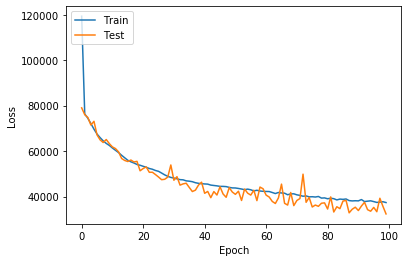

In [38]:
plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [59]:
X=wheat_df[['Latitude','Longitude','Date','Month','Year']].values
Y=wheat_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

pred_op=model.predict(X_test)

In [56]:
percent_acc=np.zeros((25654,3))
for i in range(25654):
    for j in range(3):
        percent_acc[i][j]=abs(Y_test[i][j]-pred_op[i][j])*100/Y_test[i][j]        

In [57]:
percent_acc

array([[ 2.39641779,  1.0282244 ,  2.60225568],
       [ 0.23392307,  0.47513875,  1.05444697],
       [ 3.65738613, 19.07761651, 11.73456861],
       ...,
       [ 7.61997884, 12.61763763, 10.4653084 ],
       [ 2.62279147,  7.54437088,  5.11891745],
       [ 2.27628435,  5.01862042,  2.64722697]])

In [58]:
sum(percent_acc)/25654

array([13.1547259 ,  7.55011026,  6.61772854])

In [90]:
pred_op

array([[1138.9655 , 1364.1685 , 1256.3496 ],
       [ 875.93286,  897.05426,  885.13385],
       [ 854.0649 ,  892.1912 ,  872.583  ],
       ...,
       [1099.9514 , 1137.9144 , 1118.6316 ],
       [1204.3496 , 1459.7206 , 1336.9363 ],
       [2045.4492 , 2187.6519 , 2122.3062 ]], dtype=float32)

In [81]:
Y_test

array([[1200., 1400., 1300.],
       [ 650.,  650.,  650.],
       [ 765.,  780.,  770.],
       ...,
       [1120., 1120., 1120.],
       [1150., 1375., 1250.],
       [2100., 2350., 2200.]])

In [16]:
#testing performance of all variations of rect80

In [5]:
path='C:/Users/ABC/Desktop/BE Project/from milan/models/rect80'
folders=['loss_mse']
learning_rate=[0.001]
batch_sizes=[0]
random_states=[26]

In [6]:
X=wheat_df[['Latitude','Longitude','Date','Month','Year']].values
Y=wheat_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            
            model=tf.keras.models.load_model(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)))
            #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            Y_pred=model.predict(X_test)
            percent_acc=np.zeros((25654,3))
            
            for i in range(len(X_test)):
                for j in range(3):
                    percent_acc[i][j]=abs(Y_test[i][j]-Y_pred[i][j])*100/Y_test[i][j]   
                    
            print(sum(percent_acc)/25654,batch_size,lr,folder)

[6.50425499 6.62630745 5.88885113] 0 0.001 loss_mse


In [8]:
model=tf.keras.models.load_model(r'C:\Users\ABC\Desktop\BE Project\from milan\models\rect80\loss_mse\0_0.001')

In [88]:
dummy=np.array([[ 26.7155,  79.4165,  2,  6, 20]])

In [89]:
dummy=sc.transform(dummy)
dummy

array([[ 0.32008818,  0.16878839, -1.58135995, -0.09841162,  1.70256623]])

In [90]:
model.predict([dummy])

array([[2092.0452, 2137.5144, 2114.2578]], dtype=float32)

mae 89.55672 val_mae 89.16017 0 0.001 loss_mse


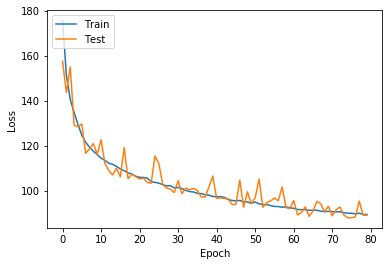

In [15]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            if folder=='loss_mse':
                print('mae',log_data['mae'][79],'val_mae',log_data['val_mae'][79],batch_size,lr,folder)
                #df[str(batch_size)+str(folder)]=log_data['val_mae']
                plt.plot(log_data['mae'])
                plt.plot(log_data['val_mae'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()
                
            if folder=='loss_mae':
                print('mae',log_data['loss'][79],'val_mae',log_data['val_loss'][79],batch_size,lr,folder)
                #df[str(batch_size)+str(folder)]=log_data['val_loss']
                plt.plot(log_data['loss'])
                plt.plot(log_data['val_loss'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()

In [89]:
df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()

In [104]:
df=df.rename(columns={'0loss_mse':'Batch GD','128loss_mse':'Minibatch GD'})

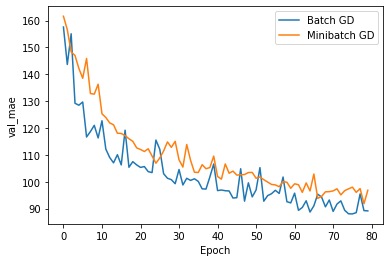

In [105]:
plt.plot(df)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df.columns,loc='upper right')

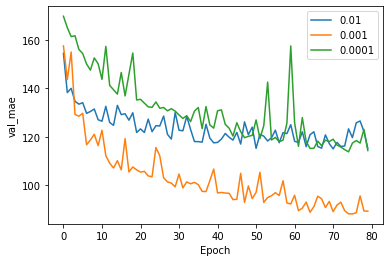

In [95]:
plt.plot(df1)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df1.columns,loc='upper right')